# MiniVGGNet
基于CIFAR-10数据集的一个MiniVGGNet网络训练
## 网络结构:
[CONV-->RELU-->BN-->CON-->RELU-->BN-->POOL-->DO(dropout)]-->[CONV-->RELU-->BN-->CON-->RELU-->BN-->POOL-->DO]-->[FC-->RELU-->BN-->DO-->FC-->SOFTMAX]

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from nn.conv.minivggnet import MiniVGGNet
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [2]:
'''
ap = argparse.ArgumentParser()
ap.add_argument("-o", "--output", required=True,
               help="path to the output loss/accuracy plot")
args = vars(ap.parse_args())
'''

'\nap = argparse.ArgumentParser()\nap.add_argument("-o", "--output", required=True,\n               help="path to the output loss/accuracy plot")\nargs = vars(ap.parse_args())\n'

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainY = trainY.astype("int")
testY = testY.astype("int")

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

lableNames = [
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse",
    "ship", "truck"
]
print("[INFO] load CIFAR-10 done")

[INFO] loading CIFAR-10 data...
[INFO] load CIFAR-10 done


In [5]:
print("[INFO] compiling model...")
opt = SGD(lr=0.01, decay=0.01 / 40, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

[INFO] compiling model...


In [6]:
print("[INFO] training network...")
H = model.fit(trainX,
              trainY,
              validation_data=(testX, testY),
              batch_size=64,
              epochs=40,
              verbose=1)

[INFO] training network...
Epoch 1/40
782/782 [==============================] - 26s 33ms/step - loss: 1.6011 - accuracy: 0.4659 - val_loss: 1.2379 - val_accuracy: 0.5758
Epoch 2/40
782/782 [==============================] - 8s 10ms/step - loss: 1.1325 - accuracy: 0.6074 - val_loss: 0.9925 - val_accuracy: 0.6457
Epoch 3/40
782/782 [==============================] - 8s 10ms/step - loss: 0.9708 - accuracy: 0.6595 - val_loss: 0.8147 - val_accuracy: 0.7125
Epoch 4/40
782/782 [==============================] - 8s 10ms/step - loss: 0.8606 - accuracy: 0.6995 - val_loss: 0.7732 - val_accuracy: 0.7306
Epoch 5/40
782/782 [==============================] - 8s 10ms/step - loss: 0.7960 - accuracy: 0.7191 - val_loss: 0.7182 - val_accuracy: 0.7495
Epoch 6/40
782/782 [==============================] - 8s 10ms/step - loss: 0.7355 - accuracy: 0.7413 - val_loss: 0.7175 - val_accuracy: 0.7489
Epoch 7/40
782/782 [==============================] - 8s 10ms/step - loss: 0.6886 - accuracy: 0.7550 - val_loss: 0

In [7]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=lableNames))


[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.86      0.82      0.84      1000
  automobile       0.91      0.91      0.91      1000
        bird       0.77      0.72      0.75      1000
         cat       0.71      0.64      0.67      1000
        deer       0.75      0.84      0.79      1000
         dog       0.74      0.75      0.74      1000
        frog       0.82      0.90      0.86      1000
       horse       0.87      0.86      0.87      1000
        ship       0.91      0.91      0.91      1000
       truck       0.89      0.89      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



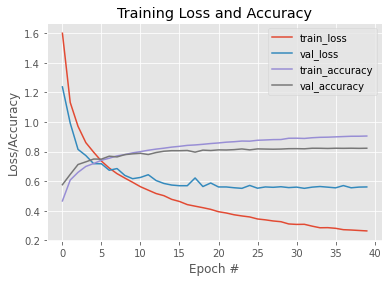

In [8]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()